## Iris Species Classification

In [60]:
#Import libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data = pd.read_csv('dataset/Iris.csv')

In [4]:
data.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [5]:
data.isnull().sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 6.0 KB


In [7]:
data.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


# EXPLORATARY DATA ANALYSIS

Text(0.5, 1.0, 'PetalLengthCm')

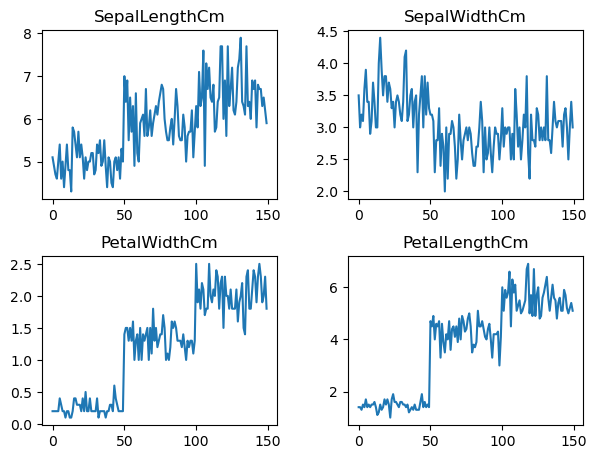

In [14]:
fig, ax=plt.subplots(2,2)
fig.tight_layout(pad=2)

ax[0,0].plot(data['SepalLengthCm'])
ax[0,0].set_title("SepalLengthCm")

ax[0,1].plot(data["SepalWidthCm"])
ax[0,1].set_title("SepalWidthCm")

ax[1,0].plot(data["PetalWidthCm"])
ax[1,0].set_title("PetalWidthCm")

ax[1,1].plot(data["PetalLengthCm"])
ax[1,1].set_title("PetalLengthCm")
    

<Axes: >

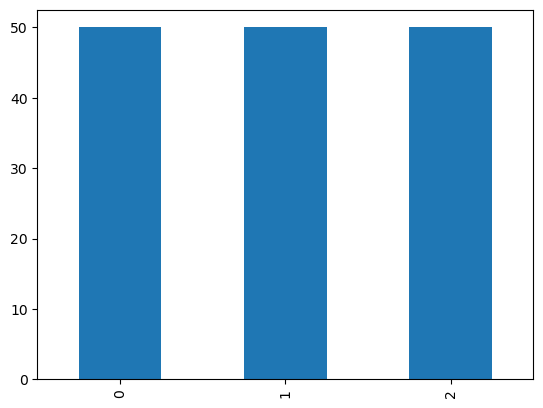

In [15]:
data['Species'].value_counts().plot.bar()

Text(0.5, 1.0, 'Box plot for SepalWidth')

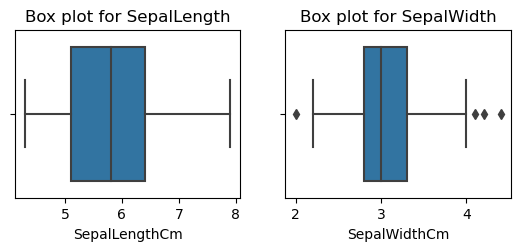

In [17]:
plt.subplot(2,2,1)
sns.boxplot(data=data, x='SepalLengthCm')
plt.title('Box plot for SepalLength')
plt.subplot(2,2,2)
sns.boxplot(data=data, x='SepalWidthCm')
plt.title('Box plot for SepalWidth')


Text(0.5, 1.0, 'Box plot for PetalWidth')

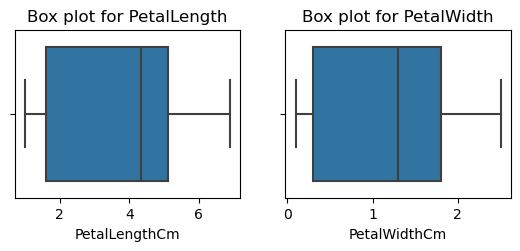

In [30]:
plt.subplot(2,2,1)
sns.boxplot(data=data, x='PetalLengthCm')
plt.title('Box plot for PetalLength')
plt.subplot(2,2,2)
sns.boxplot(data=data, x='PetalWidthCm')
plt.title('Box plot for PetalWidth')

# MODEL SELECTION

In [48]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, accuracy_score, confusion_matrix
from sklearn.preprocessing import MinMaxScaler
from sklearn.svm import LinearSVC
from sklearn.neighbors import KNeighborsClassifier

In [22]:
x = data.drop("Species", axis=1)
y=data['Species']

In [23]:
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.2, random_state=123)

In [24]:
xtrain.shape, ytrain.shape

((120, 4), (120,))

### Data Scaling 

In [25]:
scaler = MinMaxScaler()
xtrain = scaler.fit_transform(xtrain)
xtest = scaler.transform(xtest)

### Logistic Regression

In [32]:
lr = LogisticRegression(multi_class = "multinomial")
lr.fit(xtrain, ytrain)

LogisticRegression(multi_class='multinomial')

In [33]:
ypred = lr.predict(xtest)

In [34]:
accuracy_score(ytest, ypred)

0.9666666666666667

In [35]:
confusion_matrix(ytest, ypred)

array([[13,  0,  0],
       [ 0,  6,  0],
       [ 0,  1, 10]], dtype=int64)

<Axes: >

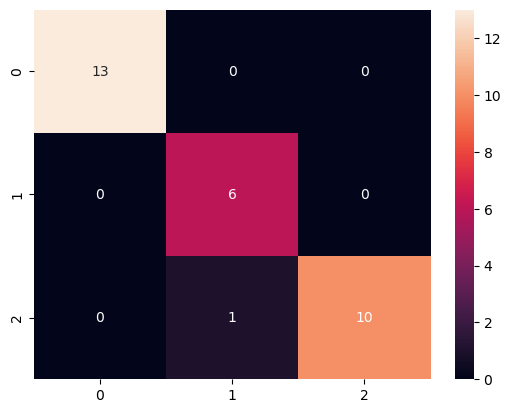

In [36]:
sns.heatmap(confusion_matrix(ytest, ypred), annot=True)

### Random Forest Classifier 

In [37]:
rf = RandomForestClassifier()
rf.fit(xtrain, ytrain)

RandomForestClassifier()

In [38]:
ypred = rf.predict(xtest)

In [39]:
accuracy_score(ytest, ypred)

0.9333333333333333

<Axes: >

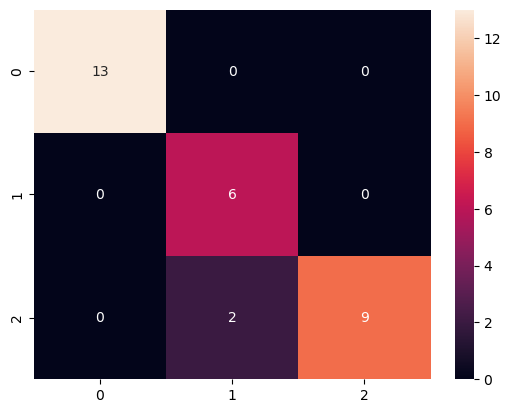

In [41]:
sns.heatmap(confusion_matrix(ytest, ypred), annot=True)

### Decision Tree Classifier  

In [42]:
dt = DecisionTreeClassifier()

In [43]:
dt.fit(xtrain, ytrain)

DecisionTreeClassifier()

In [44]:
ypred = dt.predict(xtest)

In [45]:
accuracy_score(ytest, ypred)

1.0

<Axes: >

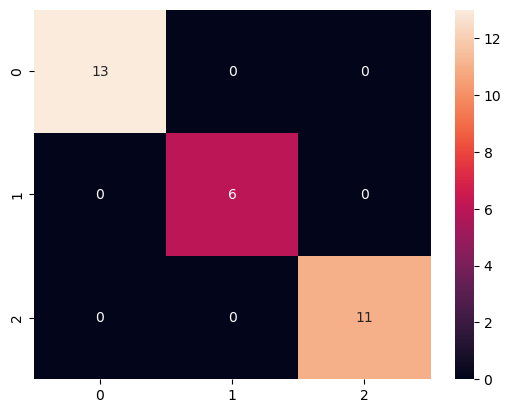

In [46]:
sns.heatmap(confusion_matrix(ytest, ypred), annot=True)

### SVM 

In [50]:
svm = LinearSVC()
svm.fit(xtrain, ytrain)

LinearSVC()

In [51]:
ypred = svm.predict(xtest)

In [52]:
accuracy_score(ytest, ypred)

0.9666666666666667

<Axes: >

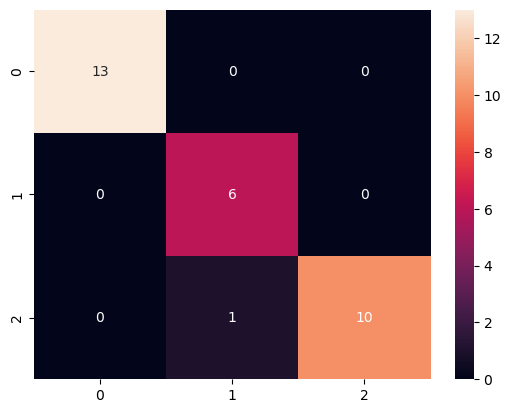

In [54]:
sns.heatmap(confusion_matrix(ytest, ypred), annot=True)

### KNeighbors Classifier 

In [55]:
kn = KNeighborsClassifier()
kn.fit(xtrain, ytrain)

KNeighborsClassifier()

In [57]:
ypred = kn.predict(xtest)
accuracy_score(ytest, ypred)

1.0

<Axes: >

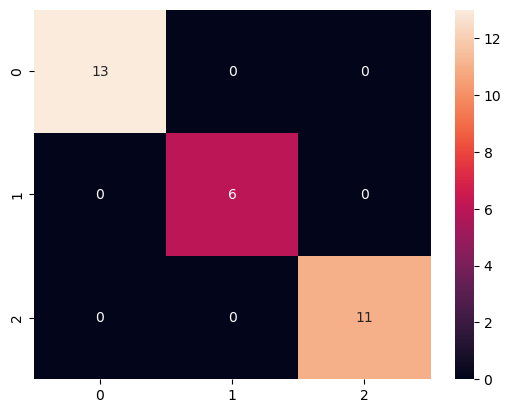

In [59]:
sns.heatmap(confusion_matrix(ytest, ypred), annot=True)

### So, The Best Algorithm is  Decision Tree Classifier and KNeighbors Classifier